Função para abrir o arquivo

In [1]:
# Abre o arquivo em modo de leitura
nome_do_arquivo = "xqf131.tsp"
try:
    with open(nome_do_arquivo, 'r') as arquivo:
        # Lê e imprime o conteúdo do arquivo
        conteudo = arquivo.read()
        print(conteudo)
except FileNotFoundError:
    print(f"O arquivo '{nome_do_arquivo}' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro: {str(e)}")


NAME : xqf131
COMMENT : Bonn VLSI data set with 131 points
COMMENT : Uni Bonn, Research Institute for Discrete Math
COMMENT : Contributed by Andre Rohe
TYPE : TSP
DIMENSION : 131
EDGE_WEIGHT_TYPE : EUC_2D
NODE_COORD_SECTION
1 0 13
2 0 26
3 0 27
4 0 39
5 2 0
6 5 13
7 5 19
8 5 25
9 5 31
10 5 37
11 5 43
12 5 8
13 8 0
14 9 10
15 10 10
16 11 10
17 12 10
18 12 5
19 15 13
20 15 19
21 15 25
22 15 31
23 15 37
24 15 43
25 15 8
26 18 11
27 18 13
28 18 15
29 18 17
30 18 19
31 18 21
32 18 23
33 18 25
34 18 27
35 18 29
36 18 31
37 18 33
38 18 35
39 18 37
40 18 39
41 18 41
42 18 42
43 18 44
44 18 45
45 25 11
46 25 15
47 25 22
48 25 23
49 25 24
50 25 26
51 25 28
52 25 29
53 25 9
54 28 16
55 28 20
56 28 28
57 28 30
58 28 34
59 28 40
60 28 43
61 28 47
62 32 26
63 32 31
64 33 15
65 33 26
66 33 29
67 33 31
68 34 15
69 34 26
70 34 29
71 34 31
72 34 38
73 34 41
74 34 5
75 35 17
76 35 31
77 38 16
78 38 20
79 38 30
80 38 34
81 40 22
82 41 23
83 41 32
84 41 34
85 41 35
86 41 36
87 48 22
88 48 27
89 48 6
90 51 

Função para plotar um gráfico com os dados

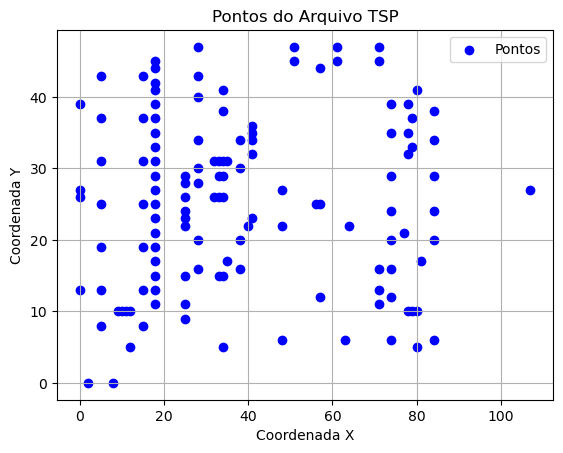

In [13]:
import matplotlib.pyplot as plt

def ler_arquivo_tsp(xqf131):
    pontos = []
    with open(nome_arquivo, 'r') as arquivo:
        lendo_pontos = False
        for linha in arquivo:
            linha = linha.strip()
            if lendo_pontos:
                if linha == "EOF":
                    break
                numero, x, y = map(float, linha.split())
                pontos.append((x, y))
            elif linha == "NODE_COORD_SECTION":
                lendo_pontos = True
    return pontos

def plotar_pontos(pontos):
    x, y = zip(*pontos)
    plt.scatter(x, y, marker='o', color='b', label='Pontos')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Pontos do Arquivo TSP')
    plt.legend()
    plt.grid(True)
    plt.show()

# Nome do arquivo TSP
nome_arquivo = 'xqf131.tsp'

# Ler as coordenadas dos pontos
pontos = ler_arquivo_tsp(nome_arquivo)

# Plotar os pontos em um gráfico
plotar_pontos(pontos)

***Sobre o algoritmo genético:

Inicialização: É a criação de uma população inicial de modelos, em que cada solução representa um indivíduo na população. Cada rota criada é uma solução, e são usadas heurísticas para descobrir uma rota.

Cálculo da fitness: Função de avaliação, que mede o quão adaptado está o indivíduo ao ambiente.  Em termos computacionais, esta medida indica o quão bem um dado candidato à solução (indivíduo) é
capaz de resolver o problema (ambiente). Em problemas de otimização de roteamento, o fitness pode ser o somatório da distância total percorrida, a fim de descobrir a menor distância possível para percorrer os 131 pontos dados.

Seleção: Processo de escolha que usualmente seleciona os indivíduos mais adaptados (que apresentam um maior fitness), para participarem do processo de reprodução. Um dos métodos mais utilizados é a seleção por torneio, que é recomendada quando há uma grande diferença relativa no valor do fitness dos indivíduos.

--- INICIALIZANDO O CÓDIGO ---

In [16]:
import random

def ler_arquivo_tsp(nome_do_arquivo):
    cidades = []
    with open(nome_do_arquivo, 'r') as arquivo:
        lendo_coord = False
        for linha in arquivo:
            linha = linha.strip()
            if linha.startswith("NODE_COORD_SECTION"):
                lendo_coord = True
            elif linha.startswith("EOF"):
                break
            elif lendo_coord:
                partes = linha.split()
                cidade_id = int(partes[0])
                x = float(partes[1])
                y = float(partes[2])
                cidades.append((cidade_id, x, y))
    return cidades

def criar_populacao_inicial(cidades, tamanho_populacao):
    # Crie indivíduos como permutações aleatórias das cidades
    populacao = []
    cidades_sem_origem = cidades[1:]  # Exclua a cidade de origem
    for _ in range(tamanho_populacao):
        cromossomo = random.sample(cidades_sem_origem, len(cidades_sem_origem))
        cromossomo.insert(0, cidades[0])  # Adicione a cidade de origem no início
        populacao.append(cromossomo)
    return populacao

# Substitua "exemplo.tsp" pelo nome do seu arquivo .tsp
nome_do_arquivo_tsp = "xqf131.tsp"

# Leitura das coordenadas das cidades do arquivo .tsp
cidades = ler_arquivo_tsp(nome_do_arquivo_tsp)

# Inicialização da população
tamanho_populacao = 20  # Tamanho da população inicial
populacao_inicial = criar_populacao_inicial(cidades, tamanho_populacao)

# Agora, a variável "populacao_inicial" contém a população inicial de cromossomos
